In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Read & Load Data :

In [2]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf

In [6]:
h5f=h5py.File('/content/drive/My Drive/SVHN_single_grey1.h5','r')

In [ ]:
h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

### Extract train and test split data :

In [7]:
trainX=h5f['X_train'][:]
testX=h5f['X_test'][:]
trainY=h5f['y_train'][:]
testY=h5f['y_test'][:]
h5f.close()

### Explore Dataset :

In [ ]:
# Printing the shape of training, testing
print("train shape of X =>",trainX.shape)
print("test shape of y =>" ,testX.shape)
print("train shape of y =>" ,trainY.shape)
print("test shape of y =>" ,testY.shape)

train shape of X => (42000, 32, 32)
test shape of y => (18000, 32, 32)
train shape of y => (42000,)
test shape of y => (18000,)


In [ ]:
# Printing the data type of training, testing
print("train datatype of X =>",trainX.dtype)
print("test datatype of y =>" ,testX.dtype)
print("train datatype of y =>" ,trainY.dtype)
print("test datatype of y =>" ,testY.dtype)

train datatype of X => float32
test datatype of y => float32
train datatype of y => uint8
test datatype of y => uint8


In [ ]:
trainX[0]

array([[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,  42.9939],
       [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,  84.2949],
       [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 , 115.4228],
       ...,
       [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,  26.0603],
       [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,  30.0661],
       [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,  53.0377]],
      dtype=float32)

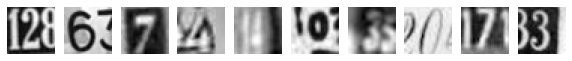

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [ ]:
# visualizing the first 10 images in the dataset and their labels
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(trainX[i],cmap='gray')
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (trainY[0:10]))

In [ ]:
np.unique(trainY)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

as we can see there are 10 unique value in label

(array([4186., 4172., 4197., 4281., 4188., 4232., 4168., 4192., 4188.,
        4196.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

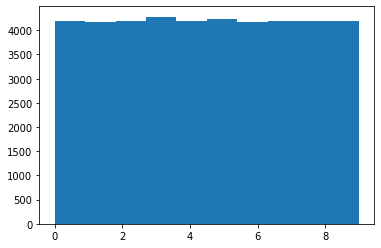

In [ ]:
#visualizing y-label data distribution in dataset
plt.hist(trainY,histtype='bar')

Above histogram shows that all y labels are distrubuted nearly equal and there is not data imbalance in dataset 

### Preprocessing Data

In [8]:
# encoding output label
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10) 

In [9]:
# Normalize the data from 0-255 to 0-1 by dividing the inputs by 255. 
trainX=trainX/255
testX=testX/255

### Implementing Deep Neural Network :

In [43]:
model_matrix=[]

##### DNN model training with sgd Optimizer

In [11]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

In [12]:
#Reshape data from 2D to 1D -> 32x32 to 1024
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))
#model.add(tf.keras.layers.BatchNormalization())

In [13]:
#ist hidden layer
model.add(tf.keras.layers.Dense(500))
model.add(tf.keras.layers.Activation('relu'))
#model.add(tf.keras.layers.BatchNormalization())

In [14]:
#2nd hidden layer
model.add(tf.keras.layers.Dense(250))
model.add(tf.keras.layers.Activation('relu'))
#model.add(tf.keras.layers.BatchNormalization())

In [15]:
#3rd hidden layer
model.add(tf.keras.layers.Dense(120))
model.add(tf.keras.layers.Activation('relu'))
#model.add(tf.keras.layers.BatchNormalization())

In [16]:
#4th hidden layer
model.add(tf.keras.layers.Dense(60))
model.add(tf.keras.layers.Activation('relu'))
#model.add(tf.keras.layers.BatchNormalization())

In [17]:
#5th hidden layer
model.add(tf.keras.layers.Dense(30))
model.add(tf.keras.layers.Activation('relu'))
#model.add(tf.keras.layers.BatchNormalization())

In [18]:
#output hidden layer
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Activation('softmax'))

In [19]:
#compile model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
# fit and test model
model.fit(trainX, trainY, 
          #validation_data=(testX, testY),
          epochs=50,batch_size=32)

Epoch 1/50
1313/1313 [==============================] - 6s 5ms/step - loss: 2.2880 - accuracy: 0.1402
Epoch 2/50
1313/1313 [==============================] - 6s 5ms/step - loss: 2.1395 - accuracy: 0.2470
Epoch 3/50
1313/1313 [==============================] - 6s 5ms/step - loss: 1.7077 - accuracy: 0.4217
Epoch 4/50
1313/1313 [==============================] - 6s 5ms/step - loss: 1.4114 - accuracy: 0.5344
Epoch 5/50
1313/1313 [==============================] - 6s 5ms/step - loss: 1.2435 - accuracy: 0.5989
Epoch 6/50
1313/1313 [==============================] - 6s 5ms/step - loss: 1.1307 - accuracy: 0.6396
Epoch 7/50
1313/1313 [==============================] - 6s 5ms/step - loss: 1.0496 - accuracy: 0.6666
Epoch 8/50
1313/1313 [==============================] - 6s 5ms/step - loss: 0.9755 - accuracy: 0.6944
Epoch 9/50
1313/1313 [==============================] - 6s 5ms/step - loss: 0.9193 - accuracy: 0.7109
Epoch 10/50
1313/1313 [==============================] - 6s 5ms/step - loss: 0.868

In [21]:
loss,accuracy=model.evaluate(testX,testY)
print ("accuracy => ",accuracy, "loss =>",loss)

563/563 [==============================] - 1s 3ms/step - loss: 0.6953 - accuracy: 0.8066
accuracy =>  0.8065555691719055 loss => 0.695298969745636


In [44]:
# add model detail
model_matrix.append(['Simple SGD DN',accuracy])

**as we can see model accuracy start with very low but after that keep improving.We can conclude that model training is not fast here, it took 20 epochs to reach 80% testmaccuracy.**

we have achieved 80% accuracy with 50 epochs on test set data using SGD optimizer.

##### Using Batch Normalization with same SGD optimizer :

In [28]:
#Initialize Sequential model
model1 = tf.keras.models.Sequential()

In [29]:
#Reshape data from 2D to 1D -> 32x32 to 1024
model1.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))
model1.add(tf.keras.layers.BatchNormalization())
#ist hidden layer
model1.add(tf.keras.layers.Dense(500))
model1.add(tf.keras.layers.BatchNormalization())
model1.add(tf.keras.layers.Activation('relu'))

#2nd hidden layer
model1.add(tf.keras.layers.Dense(250))
model1.add(tf.keras.layers.BatchNormalization())
model1.add(tf.keras.layers.Activation('relu'))

#3rd hidden layer
model1.add(tf.keras.layers.Dense(120))
model1.add(tf.keras.layers.BatchNormalization())
model1.add(tf.keras.layers.Activation('relu'))


#4th hidden layer
model1.add(tf.keras.layers.Dense(60))
model1.add(tf.keras.layers.BatchNormalization())
model1.add(tf.keras.layers.Activation('relu'))

#5th hidden layer
model1.add(tf.keras.layers.Dense(30))
model1.add(tf.keras.layers.BatchNormalization())
model1.add(tf.keras.layers.Activation('relu'))

#output hidden layer
model1.add(tf.keras.layers.Dense(10))
model1.add(tf.keras.layers.Activation('softmax'))

#compile model
model1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
# fit and test model
model1.fit(trainX, trainY,
          #validation_data=(testX, testY),
          epochs=50,batch_size=32)

Epoch 1/50
1313/1313 [==============================] - 14s 11ms/step - loss: 1.7709 - accuracy: 0.4011
Epoch 2/50
1313/1313 [==============================] - 13s 10ms/step - loss: 1.2158 - accuracy: 0.6091
Epoch 3/50
1313/1313 [==============================] - 13s 10ms/step - loss: 1.0468 - accuracy: 0.6651
Epoch 4/50
1313/1313 [==============================] - 13s 10ms/step - loss: 0.9377 - accuracy: 0.7043
Epoch 5/50
1313/1313 [==============================] - 14s 10ms/step - loss: 0.8680 - accuracy: 0.7231
Epoch 6/50
1313/1313 [==============================] - 13s 10ms/step - loss: 0.8128 - accuracy: 0.7409
Epoch 7/50
1313/1313 [==============================] - 13s 10ms/step - loss: 0.7617 - accuracy: 0.7585
Epoch 8/50
1313/1313 [==============================] - 14s 10ms/step - loss: 0.7352 - accuracy: 0.7677
Epoch 9/50
1313/1313 [==============================] - 14s 10ms/step - loss: 0.6977 - accuracy: 0.7790
Epoch 10/50
1313/1313 [==============================] - 13s 10m

In [31]:
# test model
loss1,accuracy1=model1.evaluate(testX,testY)
print ("accuracy => ",accuracy1, "loss =>",loss1)

563/563 [==============================] - 2s 3ms/step - loss: 0.5261 - accuracy: 0.8523
accuracy =>  0.8523333072662354 loss => 0.5260925889015198


In [45]:
# add model matrix
model_matrix.append(['SGD DN With Bacth Normalization',accuracy1])

**as we can see ,model took 13 epoch to reach 80% accuracy after using batch normalization and we acheieved accuracy 85% on validation set.As we also can see model does not overfit.**

##### SGD with learning rate 0.0001

In [32]:
#Initialize Sequential model
model2 = tf.keras.models.Sequential()

In [33]:
#Reshape data from 2D to 1D -> 32x32 to 1024
model2.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))
model2.add(tf.keras.layers.BatchNormalization())
#ist hidden layer
model2.add(tf.keras.layers.Dense(500))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Activation('relu'))

#2nd hidden layer
model2.add(tf.keras.layers.Dense(250))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Activation('relu'))

#3rd hidden layer
model2.add(tf.keras.layers.Dense(120))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Activation('relu'))


#4th hidden layer
model2.add(tf.keras.layers.Dense(60))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Activation('relu'))

#5th hidden layer
model2.add(tf.keras.layers.Dense(30))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Activation('relu'))

#output hidden layer
model2.add(tf.keras.layers.Dense(10))
model2.add(tf.keras.layers.Activation('softmax'))

#compile model
sgd = tf.keras.optimizers.SGD(learning_rate = 0.0001)
model2.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
# fit and test model
model2.fit(trainX, trainY,
          #validation_data=(testX, testY),
          epochs=50,batch_size=32)

Epoch 1/50
1313/1313 [==============================] - 13s 10ms/step - loss: 2.5369 - accuracy: 0.0967
Epoch 2/50
1313/1313 [==============================] - 14s 11ms/step - loss: 2.4611 - accuracy: 0.1075
Epoch 3/50
1313/1313 [==============================] - 14s 10ms/step - loss: 2.4049 - accuracy: 0.1223
Epoch 4/50
1313/1313 [==============================] - 13s 10ms/step - loss: 2.3566 - accuracy: 0.1389
Epoch 5/50
1313/1313 [==============================] - 13s 10ms/step - loss: 2.3182 - accuracy: 0.1509
Epoch 6/50
1313/1313 [==============================] - 13s 10ms/step - loss: 2.2798 - accuracy: 0.1682
Epoch 7/50
1313/1313 [==============================] - 13s 10ms/step - loss: 2.2454 - accuracy: 0.1817
Epoch 8/50
1313/1313 [==============================] - 13s 10ms/step - loss: 2.2154 - accuracy: 0.1939
Epoch 9/50
1313/1313 [==============================] - 13s 10ms/step - loss: 2.1834 - accuracy: 0.2083
Epoch 10/50
1313/1313 [==============================] - 13s 10m

model is taking very small step to learn and train itself when we lower down learning rate from 0.01 to 0.0001

In [35]:
# training model with another 50 epochs
model2.fit(trainX, trainY,
           initial_epoch=50,
          #validation_data=(testX, testY),
          epochs=100,batch_size=32)

Epoch 51/100
1313/1313 [==============================] - 12s 9ms/step - loss: 1.4983 - accuracy: 0.5381
Epoch 52/100
1313/1313 [==============================] - 12s 9ms/step - loss: 1.4840 - accuracy: 0.5439
Epoch 53/100
1313/1313 [==============================] - 12s 9ms/step - loss: 1.4771 - accuracy: 0.5446
Epoch 54/100
1313/1313 [==============================] - 12s 9ms/step - loss: 1.4654 - accuracy: 0.5502
Epoch 55/100
1313/1313 [==============================] - 12s 9ms/step - loss: 1.4555 - accuracy: 0.5560
Epoch 56/100
1313/1313 [==============================] - 11s 8ms/step - loss: 1.4447 - accuracy: 0.5587
Epoch 57/100
1313/1313 [==============================] - 11s 8ms/step - loss: 1.4356 - accuracy: 0.5627
Epoch 58/100
1313/1313 [==============================] - 11s 8ms/step - loss: 1.4285 - accuracy: 0.5622
Epoch 59/100
1313/1313 [==============================] - 11s 9ms/step - loss: 1.4190 - accuracy: 0.5661
Epoch 60/100
1313/1313 [==============================]

As we can see model still imporoving itself by taking small learning rate.We can conclude here, small learning rate is making model slow here.

##### SGD with decay learning rate

In [37]:
#Initialize Sequential model
model3 = tf.keras.models.Sequential()

In [38]:
#Reshape data from 2D to 1D -> 32x32 to 1024
model3.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))
model3.add(tf.keras.layers.BatchNormalization())
#ist hidden layer
model3.add(tf.keras.layers.Dense(500))
model3.add(tf.keras.layers.BatchNormalization())
model3.add(tf.keras.layers.Activation('relu'))

#2nd hidden layer
model3.add(tf.keras.layers.Dense(250))
model3.add(tf.keras.layers.BatchNormalization())
model3.add(tf.keras.layers.Activation('relu'))

#3rd hidden layer
model3.add(tf.keras.layers.Dense(120))
model3.add(tf.keras.layers.BatchNormalization())
model3.add(tf.keras.layers.Activation('relu'))


#4th hidden layer
model3.add(tf.keras.layers.Dense(60))
model3.add(tf.keras.layers.BatchNormalization())
model3.add(tf.keras.layers.Activation('relu'))

#5th hidden layer
model3.add(tf.keras.layers.Dense(30))
model3.add(tf.keras.layers.BatchNormalization())
model3.add(tf.keras.layers.Activation('relu'))

#output hidden layer
model3.add(tf.keras.layers.Dense(10))
model3.add(tf.keras.layers.Activation('softmax'))

#compile model
sgd = tf.keras.optimizers.SGD(learning_rate = 0.01,momentum=0.9)
model3.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
# fit and test model
model3.fit(trainX, trainY,
          #validation_data=(testX, testY),
          epochs=50,batch_size=32)

Epoch 1/50
1313/1313 [==============================] - 12s 9ms/step - loss: 1.4941 - accuracy: 0.4944
Epoch 2/50
1313/1313 [==============================] - 12s 9ms/step - loss: 1.0742 - accuracy: 0.6551
Epoch 3/50
1313/1313 [==============================] - 12s 9ms/step - loss: 0.9225 - accuracy: 0.7060
Epoch 4/50
1313/1313 [==============================] - 12s 9ms/step - loss: 0.8287 - accuracy: 0.7384
Epoch 5/50
1313/1313 [==============================] - 12s 9ms/step - loss: 0.7779 - accuracy: 0.7524
Epoch 6/50
1313/1313 [==============================] - 12s 9ms/step - loss: 0.7256 - accuracy: 0.7723
Epoch 7/50
1313/1313 [==============================] - 12s 9ms/step - loss: 0.6829 - accuracy: 0.7833
Epoch 8/50
1313/1313 [==============================] - 12s 9ms/step - loss: 0.6554 - accuracy: 0.7922
Epoch 9/50
1313/1313 [==============================] - 12s 9ms/step - loss: 0.6169 - accuracy: 0.8026
Epoch 10/50
1313/1313 [==============================] - 12s 9ms/step - l

In [40]:
# test model
loss3,accuracy3=model3.evaluate(testX,testY)
print ("accuracy => ",accuracy3, "loss =>",loss3)

563/563 [==============================] - 2s 3ms/step - loss: 0.4958 - accuracy: 0.8673
accuracy =>  0.8673333525657654 loss => 0.4958219528198242


In [46]:
# add model matrix
model_matrix.append(['SGD DN with momemtum',accuracy3])

**Accuracy did not improved much but Now accuracy is 86%**

##### using ADAM optimizer with momentum

In [51]:
#Initialize Sequential model
model4 = tf.keras.models.Sequential()

In [52]:
#Reshape data from 2D to 1D -> 32x32 to 1024
model4.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))
model4.add(tf.keras.layers.BatchNormalization())
#ist hidden layer
model4.add(tf.keras.layers.Dense(500))
model4.add(tf.keras.layers.BatchNormalization())
model4.add(tf.keras.layers.Activation('relu'))

#2nd hidden layer
model4.add(tf.keras.layers.Dense(250))
model4.add(tf.keras.layers.BatchNormalization())
model4.add(tf.keras.layers.Activation('relu'))

#3rd hidden layer
model4.add(tf.keras.layers.Dense(120))
model4.add(tf.keras.layers.BatchNormalization())
model4.add(tf.keras.layers.Activation('relu'))


#4th hidden layer
model4.add(tf.keras.layers.Dense(60))
model4.add(tf.keras.layers.BatchNormalization())
model4.add(tf.keras.layers.Activation('relu'))

#5th hidden layer
model4.add(tf.keras.layers.Dense(30))
model4.add(tf.keras.layers.BatchNormalization())
model4.add(tf.keras.layers.Activation('relu'))

#output hidden layer
model4.add(tf.keras.layers.Dense(10))
model4.add(tf.keras.layers.Activation('softmax'))

#compile model
#adam = tf.keras.optimizers.Adam(learning_rate = 0.1)
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [53]:
# fit and test model
model4.fit(trainX, trainY,
          #validation_data=(testX, testY),
          epochs=50,batch_size=32)

Epoch 1/50
1313/1313 [==============================] - 14s 11ms/step - loss: 1.5163 - accuracy: 0.4894
Epoch 2/50
1313/1313 [==============================] - 13s 10ms/step - loss: 1.0561 - accuracy: 0.6646
Epoch 3/50
1313/1313 [==============================] - 14s 10ms/step - loss: 0.9121 - accuracy: 0.7087
Epoch 4/50
1313/1313 [==============================] - 15s 11ms/step - loss: 0.8262 - accuracy: 0.7386
Epoch 5/50
1313/1313 [==============================] - 13s 10ms/step - loss: 0.7590 - accuracy: 0.7588
Epoch 6/50
1313/1313 [==============================] - 13s 10ms/step - loss: 0.7115 - accuracy: 0.7766
Epoch 7/50
1313/1313 [==============================] - 13s 10ms/step - loss: 0.6713 - accuracy: 0.7864
Epoch 8/50
1313/1313 [==============================] - 17s 13ms/step - loss: 0.6444 - accuracy: 0.7967
Epoch 9/50
1313/1313 [==============================] - 13s 10ms/step - loss: 0.6149 - accuracy: 0.8039
Epoch 10/50
1313/1313 [==============================] - 13s 10m

In [54]:
# test model
loss4,accuracy4=model4.evaluate(testX,testY)
print ("accuracy => ",accuracy4, "loss =>",loss4)

563/563 [==============================] - 3s 5ms/step - loss: 0.4721 - accuracy: 0.8740
accuracy =>  0.8740000128746033 loss => 0.4721032381057739


In [55]:
# add model matrix
model_matrix.append(['Adam DN',accuracy4])

**Accuracy Slighly improved after using Adam optimizer.It reached at 87%.**

##### Adam optimizer with Dropout 0.2 :

In [56]:
#Initialize Sequential model
model5 = tf.keras.models.Sequential()

In [57]:
#Reshape data from 2D to 1D -> 32x32 to 1024
model5.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))
model5.add(tf.keras.layers.BatchNormalization())
#ist hidden layer
model5.add(tf.keras.layers.Dense(500))
model5.add(tf.keras.layers.BatchNormalization())
model5.add(tf.keras.layers.Activation('relu'))
model5.add(tf.keras.layers.Dropout(0.20))
#2nd hidden layer
model5.add(tf.keras.layers.Dense(250))
model5.add(tf.keras.layers.BatchNormalization())
model5.add(tf.keras.layers.Activation('relu'))
model5.add(tf.keras.layers.Dropout(0.20))

#3rd hidden layer
model5.add(tf.keras.layers.Dense(120))
model5.add(tf.keras.layers.BatchNormalization())
model5.add(tf.keras.layers.Activation('relu'))
model5.add(tf.keras.layers.Dropout(0.20))

#4th hidden layer
model5.add(tf.keras.layers.Dense(60))
model5.add(tf.keras.layers.BatchNormalization())
model5.add(tf.keras.layers.Activation('relu'))

#5th hidden layer
model5.add(tf.keras.layers.Dense(30))
model5.add(tf.keras.layers.BatchNormalization())
model5.add(tf.keras.layers.Activation('relu'))

#output hidden layer
model5.add(tf.keras.layers.Dense(10))
model5.add(tf.keras.layers.Activation('softmax'))

#compile model
#adam = tf.keras.optimizers.Adam(learning_rate = 0.1)
model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [58]:
# fit and test model
model5.fit(trainX, trainY,
          #validation_data=(testX, testY),
          epochs=50,batch_size=32)

Epoch 1/50
1313/1313 [==============================] - 14s 10ms/step - loss: 1.8224 - accuracy: 0.3633
Epoch 2/50
1313/1313 [==============================] - 14s 10ms/step - loss: 1.2770 - accuracy: 0.5885
Epoch 3/50
1313/1313 [==============================] - 14s 11ms/step - loss: 1.1197 - accuracy: 0.6421
Epoch 4/50
1313/1313 [==============================] - 14s 10ms/step - loss: 1.0232 - accuracy: 0.6767
Epoch 5/50
1313/1313 [==============================] - 14s 10ms/step - loss: 0.9592 - accuracy: 0.6979
Epoch 6/50
1313/1313 [==============================] - 14s 11ms/step - loss: 0.9053 - accuracy: 0.7139
Epoch 7/50
1313/1313 [==============================] - 14s 10ms/step - loss: 0.8720 - accuracy: 0.7223
Epoch 8/50
1313/1313 [==============================] - 13s 10ms/step - loss: 0.8354 - accuracy: 0.7356
Epoch 9/50
1313/1313 [==============================] - 13s 10ms/step - loss: 0.8067 - accuracy: 0.7458
Epoch 10/50
1313/1313 [==============================] - 14s 10m

In [60]:
# test model
loss5,accuracy5=model5.evaluate(testX,testY)
print ("accuracy => ",accuracy5, "loss =>",loss5)

563/563 [==============================] - 2s 3ms/step - loss: 0.4006 - accuracy: 0.8814
accuracy =>  0.8814444541931152 loss => 0.4006446599960327


In [61]:
# add model matrix
model_matrix.append(['Adam DN Dropout',accuracy5])

**Dropout making model more generalize and improving accuracy**

##### Try with leaky Relu Activation Function :

In [68]:
#Initialize Sequential model
model6 = tf.keras.models.Sequential()

In [69]:
#Reshape data from 2D to 1D -> 32x32 to 1024
model6.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))
model6.add(tf.keras.layers.BatchNormalization())
#ist hidden layer
model6.add(tf.keras.layers.Dense(500))
model6.add(tf.keras.layers.BatchNormalization())
actlayer = tf.keras.layers.LeakyReLU()
model6.add(tf.keras.layers.Activation(actlayer))
#model6.add(tf.keras.layers.Dropout(0.20))
#2nd hidden layer
model6.add(tf.keras.layers.Dense(250))
model6.add(tf.keras.layers.BatchNormalization())
actlayer = tf.keras.layers.LeakyReLU()
model6.add(tf.keras.layers.Activation(actlayer))
#model6.add(tf.keras.layers.Dropout(0.20))

#3rd hidden layer
model6.add(tf.keras.layers.Dense(120))
model6.add(tf.keras.layers.BatchNormalization())
actlayer = tf.keras.layers.LeakyReLU()
model6.add(tf.keras.layers.Activation(actlayer))
#model6.add(tf.keras.layers.Dropout(0.20))

#4th hidden layer
model6.add(tf.keras.layers.Dense(60))
model6.add(tf.keras.layers.BatchNormalization())
model6.add(tf.keras.layers.Activation('relu'))

#5th hidden layer
model6.add(tf.keras.layers.Dense(30))
model6.add(tf.keras.layers.BatchNormalization())
model6.add(tf.keras.layers.Activation('relu'))

#output hidden layer
model6.add(tf.keras.layers.Dense(10))
model6.add(tf.keras.layers.Activation('softmax'))

#compile model
#adam = tf.keras.optimizers.Adam(learning_rate = 0.1)
model6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [70]:
# fit and test model
model6.fit(trainX, trainY,
          #validation_data=(testX, testY),
          epochs=50,batch_size=32)

Epoch 1/50
1313/1313 [==============================] - 14s 10ms/step - loss: 1.4645 - accuracy: 0.5196
Epoch 2/50
1313/1313 [==============================] - 13s 10ms/step - loss: 1.0923 - accuracy: 0.6530
Epoch 3/50
1313/1313 [==============================] - 13s 10ms/step - loss: 0.9626 - accuracy: 0.6939
Epoch 4/50
1313/1313 [==============================] - 13s 10ms/step - loss: 0.8797 - accuracy: 0.7215
Epoch 5/50
1313/1313 [==============================] - 14s 11ms/step - loss: 0.8321 - accuracy: 0.7392
Epoch 6/50
1313/1313 [==============================] - 15s 11ms/step - loss: 0.7911 - accuracy: 0.7515
Epoch 7/50
1313/1313 [==============================] - 15s 11ms/step - loss: 0.7488 - accuracy: 0.7630
Epoch 8/50
1313/1313 [==============================] - 14s 11ms/step - loss: 0.7204 - accuracy: 0.7749
Epoch 9/50
1313/1313 [==============================] - 14s 11ms/step - loss: 0.6985 - accuracy: 0.7789
Epoch 10/50
1313/1313 [==============================] - 13s 10m

In [71]:
# test model
loss6,accuracy6=model6.evaluate(testX,testY)
print ("accuracy => ",accuracy6, "loss =>",loss6)

563/563 [==============================] - 2s 3ms/step - loss: 0.4527 - accuracy: 0.8687
accuracy =>  0.8686666488647461 loss => 0.4527226686477661


In [72]:
model_matrix.append(["leaky relu DNN",accuracy6])

###Comparing DNN models accuracy

In [73]:
#pring matrix
model_matrix

[['Simple SGD DN', 0.8065555691719055],
 ['SGD DN With Bacth Normalization', 0.8523333072662354],
 ['SGD DN with momemtum', 0.8673333525657654],
 ['Adam DN', 0.8740000128746033],
 ['Adam DN Dropout', 0.8814444541931152],
 ['leaky relu DNN', 0.8686666488647461]]

###Conclusion

1. As we can see in matrix , best accuracy has been achieved using Adam Optimizer.
2. low learning rate 0.0001 is making model is very slow to learn.
3. Batch normalization tend to normalize hidden layer weights to close mean 0 and variance 1. So wights value tend to keep in range . So it makes model to learn fast. As we can see without batch normalization , model are very slow to learn. 

### Predict the Result :

##### Image-1

In [79]:
#Predicting the digits
model5.predict_classes(testX[10].reshape(1,1024))

array([8])

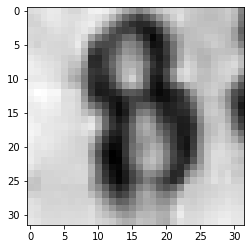

In [81]:
#Showing the image
plt.imshow(testX[10],cmap='gray')

Image-2

In [82]:
#Predicting the digits
model5.predict_classes(testX[14].reshape(1,1024))

array([3])

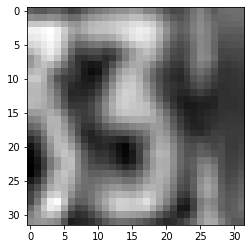

In [83]:
#Showing the image
plt.imshow(testX[14],cmap='gray')